# Correlation of Speech Features and Demographics / Neuropsychological Questionnaires

##### Import modules

In [10]:
import pandas as pd
import plotly.graph_objects as go # plot heatmap of correlation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import plotly
import matplotlib
import scipy


In [11]:
# Print the versions of the packages
versions = {
    "pandas": pd.__version__,
    "plotly": plotly.__version__,
    "seaborn": sns.__version__,
    "matplotlib": matplotlib.__version__,
    "numpy": np.__version__,
    "scipy": scipy.__version__
}

versions

{'pandas': '1.1.3',
 'plotly': '4.14.3',
 'seaborn': '0.11.0',
 'matplotlib': '3.3.2',
 'numpy': '1.23.2',
 'scipy': '1.9.0'}

##### Define Speech Feature Categories

In [12]:
# Define the categories and their corresponding features
categories_dict = {
    "pos_frequency_related": ["pitch_max_pos", "pitch_min_pos", "pitch_mean_pos", "pitch_std_pos", "pitch_range_pos", 
                              "pitch_coefficient_of_variation_pos", "pitch_skewness_pos", "pitch_kurtosis_pos", 
                              "jitter_local_mean_pos", "jitter_local_sd_pos", "vocal_tremor_pos", "f0_range_pos", 
                              "f1_frequency_mean_pos", "f1_frequency_sd_pos", "f2_frequency_mean_pos", 
                              "f2_frequency_sd_pos", "f3_frequency_mean_pos", "f3_frequency_sd_pos"],
    "pos_energy_related": ["shimmer_local_dB_mean_pos", "shimmer_local_dB_sd_pos", "loudness_mean_pos", 
                           "loudness_sd_pos", "hnr_mean_pos", "hnr_sd_pos"],
    "pos_spectral_balance": ["alpha_ratio_mean_pos", "alpha_ratio_sd_pos", "hammarberg_index_mean_pos", 
                             "hammarberg_index_sd_pos", "f1_relative_energy_mean_pos", "f1_relative_energy_sd_pos", 
                             "f2_relative_energy_mean_pos", "f2_relative_energy_sd_pos", "f3_relative_energy_mean_pos", 
                             "f3_relative_energy_sd_pos", "average_mfccs_1_pos", "average_mfccs_2_pos", 
                             "average_mfccs_3_pos", "average_mfccs_4_pos"],
    "pos_temporal": ["duration_pos", "speech_ratio_pos", "pause_durations_sum_pos", "pause_durations_mean_pos", 
                     "pause_durations_sd_pos", "number_of_pauses_pos", "pause_rate_pos", "utterance_durations_sum_pos", 
                     "utterance_durations_mean_pos", "utterance_durations_sd_pos"],
    "pos_lexical_richness": ["word_frequency_mean_pos", "word_frequency_sd_pos", "word_frequency_range_pos", 
                             "honore_stat_pos", "brunets_index_pos", "word_count_pos"],
    "pos_sentiment": ["mean_sentiment_pos", "negative_sentence_ratio_pos", "neutral_sentence_ratio_pos", 
                      "positive_sentence_ratio_pos"],
    "pos_word_types": ["pronoun_rate_pos", "adjective_rate_pos", "adposition_rate_pos", "adverb_rate_pos", 
                       "conjunction_rate_pos", "determiner_rate_pos", "inflected_verb_rate_pos", "noun_rate_pos", 
                       "proper_noun_rate_pos", "verb_rate_pos"],
    "pos_syntactic_complexity": ["proportion_verb_phrase_with_objects_pos", "proportion_verb_phrase_with_subjects_pos", 
                                 "mean_number_subordinate_clauses_pos", "verb_phrase_with_aux_and_vp_rate_pos", 
                                 "verb_phrase_with_aux_rate_pos"],
    "neg_frequency_related": ["pitch_max_neg", "pitch_min_neg", "pitch_mean_neg", "pitch_std_neg", "pitch_range_neg", 
                              "pitch_coefficient_of_variation_neg", "pitch_skewness_neg", "pitch_kurtosis_neg", 
                              "jitter_local_mean_neg", "jitter_local_sd_neg", "vocal_tremor_neg", "f0_range_neg", 
                              "f1_frequency_mean_neg", "f1_frequency_sd_neg", "f2_frequency_mean_neg", 
                              "f2_frequency_sd_neg", "f3_frequency_mean_neg", "f3_frequency_sd_neg"],
    "neg_energy_related": ["shimmer_local_dB_mean_neg", "shimmer_local_dB_sd_neg", "loudness_mean_neg", 
                           "loudness_sd_neg", "hnr_mean_neg", "hnr_sd_neg"],
    "neg_spectral_balance": ["alpha_ratio_mean_neg", "alpha_ratio_sd_neg", "hammarberg_index_mean_neg", 
                             "hammarberg_index_sd_neg", "f1_relative_energy_mean_neg", "f1_relative_energy_sd_neg", 
                             "f2_relative_energy_mean_neg", "f2_relative_energy_sd_neg", "f3_relative_energy_mean_neg", 
                             "f3_relative_energy_sd_neg", "average_mfccs_1_neg", "average_mfccs_2_neg", 
                             "average_mfccs_3_neg", "average_mfccs_4_neg"],
    "neg_temporal": ["duration_neg", "speech_ratio_neg", "pause_durations_sum_neg", "pause_durations_mean_neg", 
                     "pause_durations_sd_neg", "number_of_pauses_neg", "pause_rate_neg", "utterance_durations_sum_neg", 
                     "utterance_durations_mean_neg", "utterance_durations_sd_neg"],
    "neg_lexical_richness": ["word_frequency_mean_neg", "word_frequency_sd_neg", "word_frequency_range_neg", 
                             "honore_stat_neg", "brunets_index_neg", "word_count_neg"],
    "neg_sentiment": ["mean_sentiment_neg", "negative_sentence_ratio_neg", "neutral_sentence_ratio_neg", 
                      "positive_sentence_ratio_neg"],
    "neg_word_types": ["pronoun_rate_neg", "adjective_rate_neg", "adposition_rate_neg", "adverb_rate_neg", 
                       "conjunction_rate_neg", "determiner_rate_neg", "inflected_verb_rate_neg", "noun_rate_neg", 
                       "proper_noun_rate_neg", "verb_rate_neg"],
    "neg_syntactic_complexity": ["proportion_verb_phrase_with_objects_neg", "proportion_verb_phrase_with_subjects_neg", 
                                 "mean_number_subordinate_clauses_neg", "verb_phrase_with_aux_and_vp_rate_neg", 
                                 "verb_phrase_with_aux_rate_neg"]
}

# Create a DataFrame for the feature categories
feature_category_mapping = []
for category, features in categories_dict.items():
    for feature in features:
        feature_category_mapping.append({"Speech_Feature": feature, "Category": category})

feature_category_df = pd.DataFrame(feature_category_mapping)

# Save or display the DataFrame
feature_category_df.head()


,Speech_Feature,Category
0,pitch_max_pos,pos_frequency_related
1,pitch_min_pos,pos_frequency_related
2,pitch_mean_pos,pos_frequency_related
3,pitch_std_pos,pos_frequency_related
4,pitch_range_pos,pos_frequency_related


##### Create dataset

Combine Speech Features with Questionnaire Results

In [13]:
# Load the datasets with the correct delimiter
speech_demographic_info_path = 'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/combined_speech_demographic_info.csv'
speech_demographic_info_df = pd.read_csv(speech_demographic_info_path, delimiter=';')

# Melt the speech_demographic_info_df to long format
melted_speech_df = speech_demographic_info_df.melt(id_vars=['bids_number', 'participant_id', 'Gender', 'Alter', 'Gender_f1_m2', 'Group_MDD1_HC2'],
                                                   var_name='Speech_Feature',
                                                   value_name='Feature_Value')

melted_speech_df['Feature_Value'] = pd.to_numeric(melted_speech_df['Feature_Value'], errors='coerce')

# Merge the melted dataframe with feature_category_df
merged_df = melted_speech_df.merge(feature_category_df, on='Speech_Feature', how='left')

# Filter out rows with NaN values in Category
filtered_df = merged_df.dropna(subset=['Category'])

# Pivot the filtered dataframe to have one row per participant, summarizing feature values by category
pivot_df = filtered_df.pivot_table(
    index=['bids_number', 'participant_id', 'Gender', 'Alter', 'Gender_f1_m2', 'Group_MDD1_HC2'],
    columns='Category',
    values='Feature_Value',
    aggfunc='mean'
).reset_index()

# Merge the pivoted dataframe with the original speech_demographic_info_df to include questionnaire results
final_merged_df = speech_demographic_info_df.merge(
    pivot_df, 
    on=['bids_number', 'participant_id', 'Gender', 'Alter', 'Gender_f1_m2', 'Group_MDD1_HC2'], 
    how='left'
)

# Identify columns related to questionnaire results
questionnaire_cols = [col for col in final_merged_df.columns if col.startswith('CERQ_') or col in [
    'BVAQ_New', 'BDI-II Sum score', 'STAI2', 'STAI1', 'WMS Correct Norm', 'WMS Correct',
    'Error B Norm', 'TM B Norm', 'B/A Norm', 'B/A', 'TM A', 'TM Practice A', 'TM B',
    'TM Practice B', 'Error A', 'Error B', 'Hamilton Score Norm', 'Hamilton Score',
    'DigitSpan_Forwards_Span', 'DigitSpan_ForwardsTotal Score', 'DigitSpan_Backwards_Span',
    'DigitSpan_Backwards_Total Score', 'DERS_Gesamtwert', 'DERS_Gesamtwert Norm',
    'DERS_Nicht-Akzeptanz emotionalerReaktionen Norm', 'DERS_Probleme mit zielorientiertem Verhalten Norm',
    'DERS_Impulskontrollprobleme Norm', 'DERS_Mangel an emotionaler Aufmerksamkeit Norm',
    'DERS_Eingeschränkter Zugang zu Emotionsregulations-Strategien Norm', 'DERS_Mangel an emotionaler Klarheit Norm',
    'DERS_Nicht-Akzeptanz emotionalerReaktionen', 'DERS_Probleme mit zielorientiertem Verhalten',
    'DERS_Impulskontrollprobleme', 'DERS_Mangel an emotionaler Aufmerksamkeit',
    'DERS_Eingeschränkter Zugang zu Emotionsregulations-Strategien', 'DERS_Mangel an emotionaler Klarheit'
]]

# Select the category columns and questionnaire result columns
category_cols = list(categories_dict.keys())
selected_cols = ['Gender', 'Alter', 'Gender_f1_m2', 'Group_MDD1_HC2'] + category_cols + questionnaire_cols

# Filter the dataframe to include only the selected columns
analysis_df = final_merged_df[selected_cols]

# Dictionary to map German column names to English column names
translation_dict = {
    'Gender': 'Gender',
    'Alter': 'Age',
    'Gender_f1_m2': 'Sex',
    'Group_MDD1_HC2': 'Group',
    'BVAQ_New': 'BVAQ',
    'BDI-II Sum score': 'BDI-II',
    'STAI2': 'STAI2',
    'STAI1': 'STAI1',
    'WMS Correct Norm': 'WMS Correct Norm',
    'WMS Correct': 'WMS Correct',
    'Error B Norm': 'Error B Norm',
    'TM B Norm': 'TM B Norm',
    'B/A Norm': 'B/A Norm',
    'B/A': 'B/A',
    'TM A': 'TM A',
    'TM Practice A': 'TM Practice A',
    'TM B': 'TM B',
    'TM Practice B': 'TM Practice B',
    'Error A': 'Error A',
    'Error B': 'Error B',
    'Hamilton Score Norm': 'Hamilton Score Norm',
    'Hamilton Score': 'Hamilton Score',
    'DigitSpan_Forwards_Span': 'DigitSpan Forwards Span',
    'DigitSpan_ForwardsTotal Score': 'DigitSpan Forwards Total Score',
    'DigitSpan_Backwards_Span': 'DigitSpan Backwards Span',
    'DigitSpan_Backwards_Total Score': 'DigitSpan Backwards Total Score',
    'DERS_Gesamtwert': 'DERS Total Score',
    'DERS_Gesamtwert Norm': 'DERS Total Score Norm',
    'DERS_Nicht-Akzeptanz emotionalerReaktionen Norm': 'DERS Non-Acceptance of Emotional Reactions Norm',
    'DERS_Probleme mit zielorientiertem Verhalten Norm': 'DERS Problems with Goal-Oriented Behavior Norm',
    'DERS_Impulskontrollprobleme Norm': 'DERS Impulse Control Problems Norm',
    'DERS_Mangel an emotionaler Aufmerksamkeit Norm': 'DERS Lack of Emotional Awareness Norm',
    'DERS_Eingeschränkter Zugang zu Emotionsregulations-Strategien Norm': 'DERS Limited Access to Emotion Regulation Strategies Norm',
    'DERS_Mangel an emotionaler Klarheit Norm': 'DERS Lack of Emotional Clarity Norm',
    'DERS_Nicht-Akzeptanz emotionalerReaktionen': 'DERS Non-Acceptance of Emotional Reactions',
    'DERS_Probleme mit zielorientiertem Verhalten': 'DERS Problems with Goal-Oriented Behavior',
    'DERS_Impulskontrollprobleme': 'DERS Impulse Control Problems',
    'DERS_Mangel an emotionaler Aufmerksamkeit': 'DERS Lack of Emotional Awareness',
    'DERS_Eingeschränkter Zugang zu Emotionsregulations-Strategien': 'DERS Limited Access to Emotion Regulation Strategies',
    'DERS_Mangel an emotionaler Klarheit': 'DERS Lack of Emotional Clarity',
    'CERQ_Selbstbeschuldigung Norm': 'CERQ Self-Blame Norm',
    'CERQ_Akzeptanz Norm': 'CERQ Acceptance Norm',
    'CERQ_Rumination Norm': 'CERQ Rumination Norm',
    'CERQ_Positive Refokussierung Norm': 'CERQ Positive Refocusing Norm',
    'CERQ_Refokussierung auf Planung Norm': 'CERQ Refocusing on Planning Norm',
    'CERQ_Positive Neubewertung Norm': 'CERQ Positive Reappraisal Norm',
    'CERQ_Relativieren Norm': 'CERQ Putting into Perspective Norm',
    'CERQ_Katastrophisierung Norm': 'CERQ Catastrophizing Norm',
    'CERQ_Andere Beschuldigen Norm': 'CERQ Other-Blame Norm',
    'CERQ_Selbstbeschuldigung': 'CERQ Self-Blame',
    'CERQ_Akzeptanz': 'CERQ Acceptance',
    'CERQ_Rumination': 'CERQ Rumination',
    'CERQ_Positive Refokussierung': 'CERQ Positive Refocusing',
    'CERQ_Refokussierung auf Planung': 'CERQ Refocusing on Planning',
    'CERQ_Positive Neubewertung': 'CERQ Positive Reappraisal',
    'CERQ_Relativieren': 'CERQ Putting into Perspective',
    'CERQ_Katastrophisierung': 'CERQ Catastrophizing',
    'CERQ_Andere Beschuldigen': 'CERQ Other-Blame'
}

# Translate the column names
analysis_df.rename(columns=translation_dict, inplace=True)

c:\Users\juhoffmann\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
analysis_df.head()

,Gender,Age,Sex,Group,pos_frequency_related,pos_energy_related,pos_spectral_balance,pos_temporal,pos_lexical_richness,pos_sentiment,...,CERQ Other-Blame Norm,CERQ Self-Blame,CERQ Acceptance,CERQ Rumination,CERQ Positive Refocusing,CERQ Refocusing on Planning,CERQ Positive Reappraisal,CERQ Putting into Perspective,CERQ Catastrophizing,CERQ Other-Blame
0,female,24,1,2,415.336950,3.256925,9.395348,5.385066,381.346706,0.416667,...,-0.1598,18,9,10,4,7,5,4,13,5
1,female,30,1,1,415.851251,-11.334059,12.340165,26.112714,300.708490,0.472222,...,-0.1598,12,16,17,4,8,8,12,8,5
2,female,25,1,2,430.925567,-5.223464,9.488076,17.224173,280.751988,0.375000,...,0.3557,9,16,14,12,16,16,18,4,6
3,male,26,2,1,399.105242,-4.970445,13.294807,23.023818,296.960714,0.363636,...,0.8711,11,11,10,7,14,10,14,5,7
4,female,30,1,2,408.628937,0.402580,11.261200,3.062552,221.070481,0.250000,...,5.5103,6,17,14,8,10,9,13,7,16


##### Estiamte Correlation across all participants

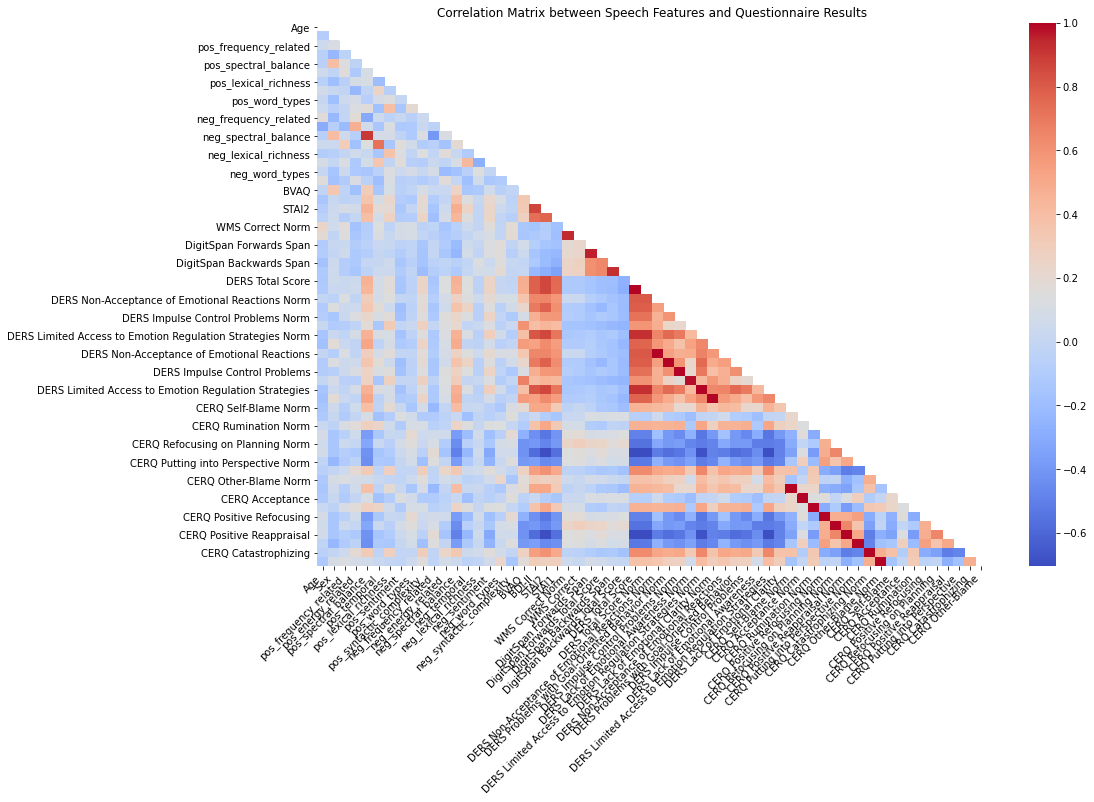

Number of comparisons corrected for Bonferroni: 3600
Bonferroni correction threshold: 1.388888888888889e-05


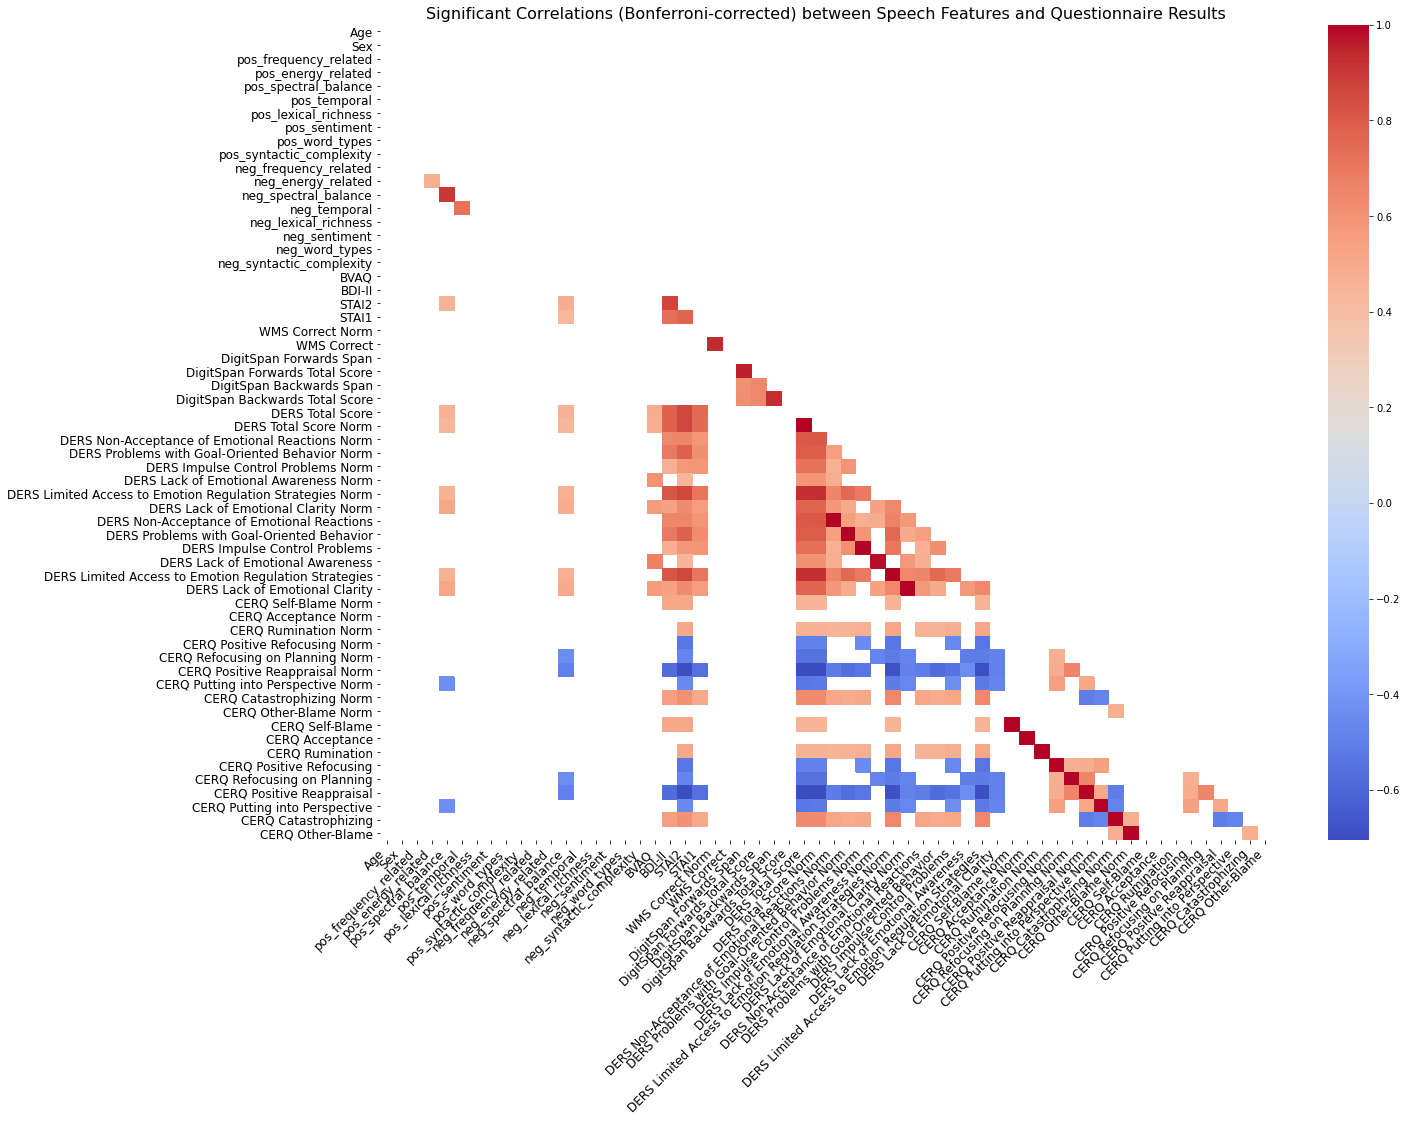

In [15]:
# Exclude some columns from the correlation matrix
columns_to_exclude = ['TM Practice B', 'TM Practice A', 'Group']  
analysis_df_filtered = analysis_df.drop(columns=columns_to_exclude)

# Compute the correlation matrix
correlation_matrix = analysis_df_filtered.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask = mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix between Speech Features and Questionnaire Results')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Plot interactive heatmap using plotly.graph_objects
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.to_numpy(),
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale='Viridis',
    zmin=-1, zmax=1,
    showscale=True
))

fig.update_layout(
    title='Interactive Correlation Matrix between Speech Features and Questionnaire Results',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    autosize=False,
    width=1500,
    height=1500
)

fig.show()
fig.write_html("W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questinnaire_correlations_interactive.html")

# Calculate the correlation matrix and the corresponding p-values matrix
def calculate_correlations(df):
    correlations = df.corr()
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlations.shape)
    return correlations, p_values

correlation_matrix, p_values = calculate_correlations(analysis_df_filtered)

# Apply Bonferroni correction
alpha = 0.05
num_tests = p_values.size
bonferroni_threshold = alpha / num_tests

# Print the information for Bonferroni correction
print(f"Number of comparisons corrected for Bonferroni: {num_tests}")
print(f"Bonferroni correction threshold: {bonferroni_threshold}")

# Create a mask for significant correlations
significant_mask = (p_values < bonferroni_threshold)

# Mask insignificant correlations in the correlation matrix
significant_correlations = correlation_matrix.where(significant_mask)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(significant_correlations, dtype=bool))

# Plot the significant correlations using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(significant_correlations, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Significant Correlations (Bonferroni-corrected) between Speech Features and Questionnaire Results', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Extract significant correlations
significant_pairs = []

for row in range(correlation_matrix.shape[0]):
    for col in range(row+1, correlation_matrix.shape[1]):
        if p_values.iloc[row, col] < bonferroni_threshold:
            significant_pairs.append({
                'Variable1': correlation_matrix.index[row],
                'Variable2': correlation_matrix.columns[col],
                'Correlation': correlation_matrix.iloc[row, col],
                'P-Value': p_values.iloc[row, col]
            })

significant_pairs_df = pd.DataFrame(significant_pairs)

# Save the significant correlations to a CSV file
significant_pairs_df.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/speech_questionnaire_correlation_corrected.csv', index=False)

##### Estimate Correlation across all participants without normalized questionnaires

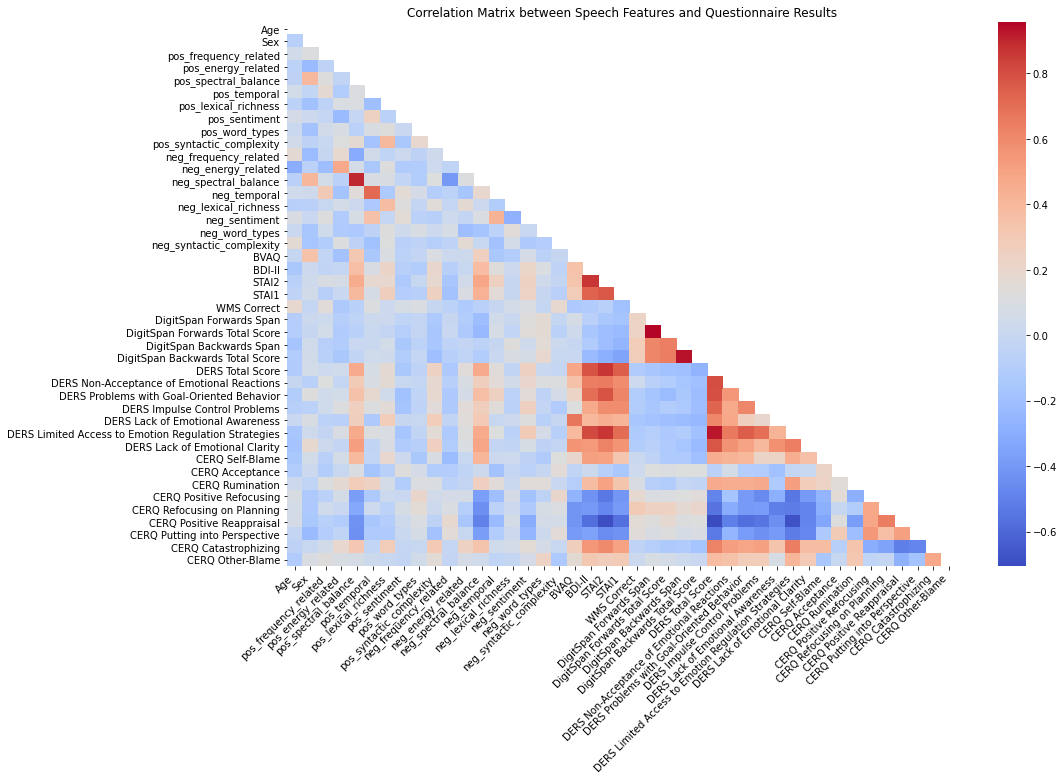

Number of comparisons corrected for Bonferroni: 1849
Bonferroni correction threshold: 2.7041644131963226e-05


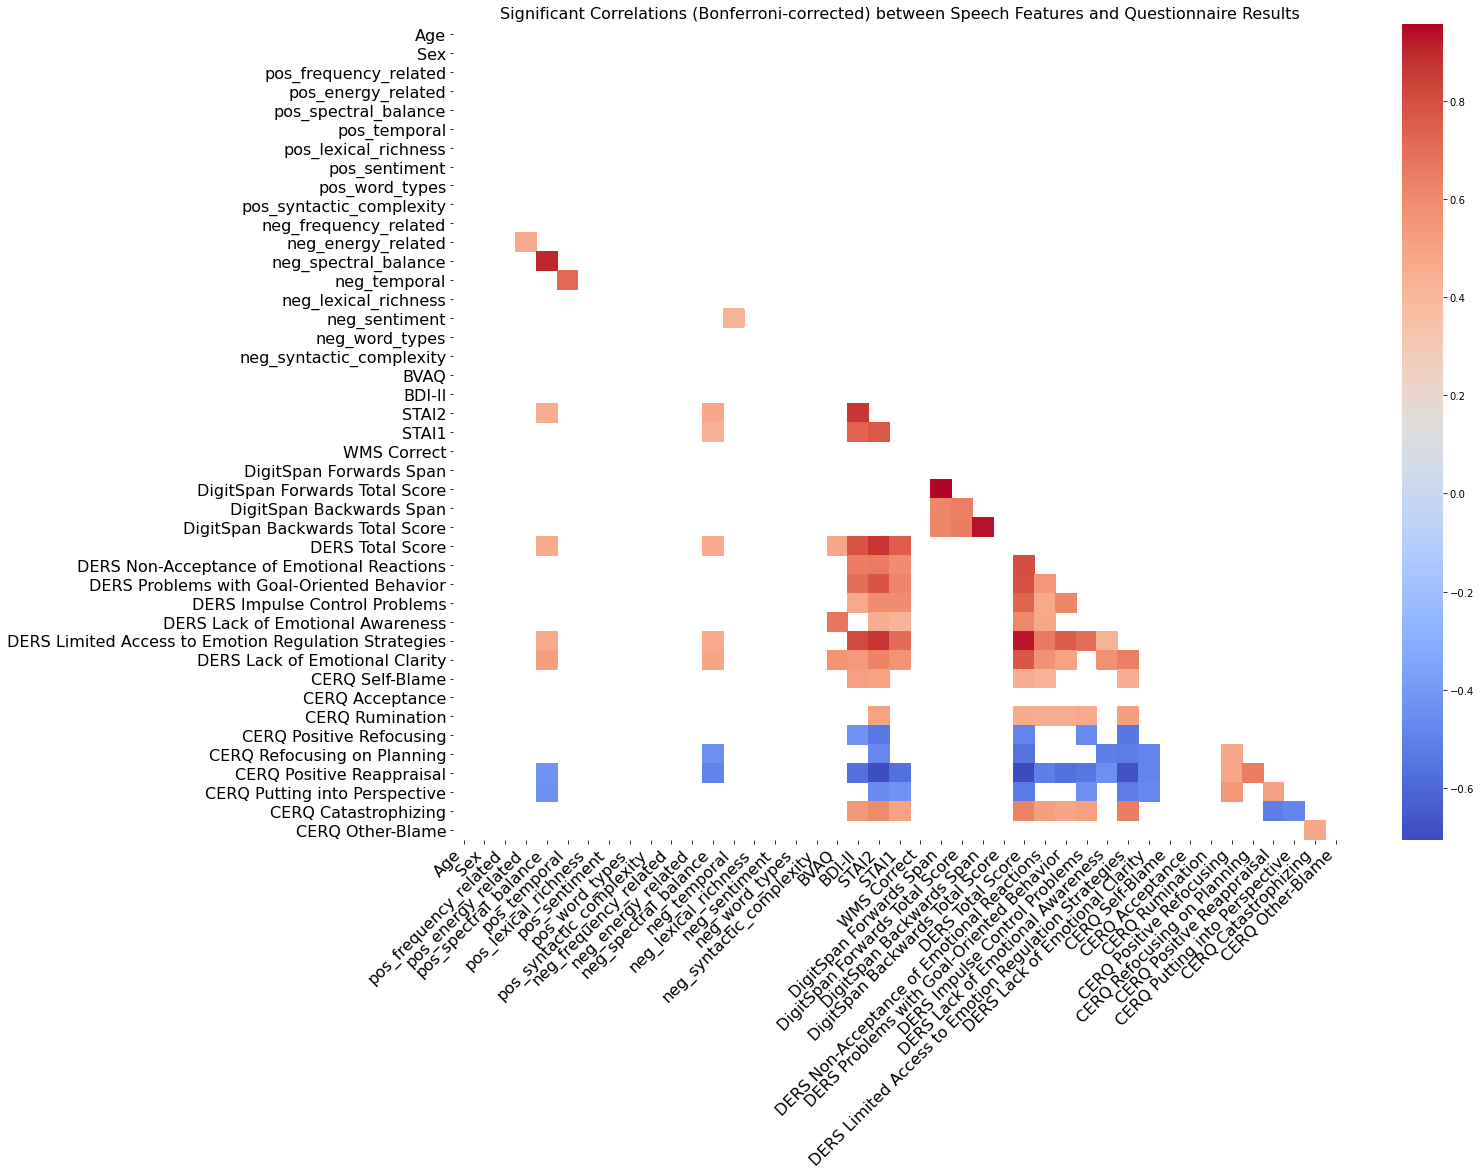

In [16]:
# Exclude some columns from the correlation matrix
columns_to_exclude = ['TM Practice B', 'TM Practice A', 'Group',
    'WMS Correct Norm',
    'Error B Norm',
    'TM B Norm',
    'B/A Norm',
    'Hamilton Score Norm',
    'DERS Total Score Norm',
    'DERS Non-Acceptance of Emotional Reactions Norm',
    'DERS Problems with Goal-Oriented Behavior Norm',
    'DERS Impulse Control Problems Norm',
    'DERS Lack of Emotional Awareness Norm',
    'DERS Limited Access to Emotion Regulation Strategies Norm',
    'DERS Lack of Emotional Clarity Norm',
    'CERQ Self-Blame Norm',
    'CERQ Acceptance Norm',
    'CERQ Rumination Norm',
    'CERQ Positive Refocusing Norm',
    'CERQ Refocusing on Planning Norm',
    'CERQ Positive Reappraisal Norm',
    'CERQ Putting into Perspective Norm',
    'CERQ Catastrophizing Norm',
    'CERQ Other-Blame Norm'
]

analysis_df_filtered = analysis_df.drop(columns=columns_to_exclude)

# Compute the correlation matrix
correlation_matrix = analysis_df_filtered.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, mask= mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Correlation Matrix between Speech Features and Questionnaire Results')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Save the figure
plt.savefig('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questionnaire_correlation_significant_all.png', bbox_inches='tight')
plt.show()



# Plot interactive heatmap using plotly.graph_objects
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.to_numpy(),
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale='Viridis',
    zmin=-1, zmax=1,
    showscale=True
))

fig.update_layout(
    title='Interactive Correlation Matrix between Speech Features and Questionnaire Results',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0),
    autosize=False,
    width=1500,
    height=1500
)

fig.show()
fig.write_html("W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questinnaire_correlations_reduced_interactive.html")

# Calculate the correlation matrix and the corresponding p-values matrix
def calculate_correlations(df):
    correlations = df.corr()
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlations.shape)
    return correlations, p_values

correlation_matrix, p_values = calculate_correlations(analysis_df_filtered)

# Apply Bonferroni correction
alpha = 0.05
num_tests = p_values.size
bonferroni_threshold = alpha / num_tests

# Print the information for Bonferroni correction
print(f"Number of comparisons corrected for Bonferroni: {num_tests}")
print(f"Bonferroni correction threshold: {bonferroni_threshold}")

# Create a mask for significant correlations
significant_mask = (p_values < bonferroni_threshold)

# Mask insignificant correlations in the correlation matrix
significant_correlations = correlation_matrix.where(significant_mask)

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(significant_correlations, dtype=bool))

# Plot the significant correlations using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(significant_correlations, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Significant Correlations (Bonferroni-corrected) between Speech Features and Questionnaire Results', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=16)
# Save the figure
plt.savefig('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questionnaire_correlation_significant.png', bbox_inches='tight')
plt.show()



# Extract significant correlations
significant_pairs = []

for row in range(correlation_matrix.shape[0]):
    for col in range(row+1, correlation_matrix.shape[1]):
        if p_values.iloc[row, col] < bonferroni_threshold:
            significant_pairs.append({
                'Variable1': correlation_matrix.index[row],
                'Variable2': correlation_matrix.columns[col],
                'Correlation': correlation_matrix.iloc[row, col],
                'P-Value': p_values.iloc[row, col]
            })

significant_pairs_df = pd.DataFrame(significant_pairs)

# Save the significant correlations to a CSV file
significant_pairs_df.to_csv('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/speech_questionnaire_correlation_reduced_corrected.csv', index=False)

show only correlations with speech categories

Number of comparisons corrected for Bonferroni: 1849
Bonferroni correction threshold: 2.7041644131963226e-05


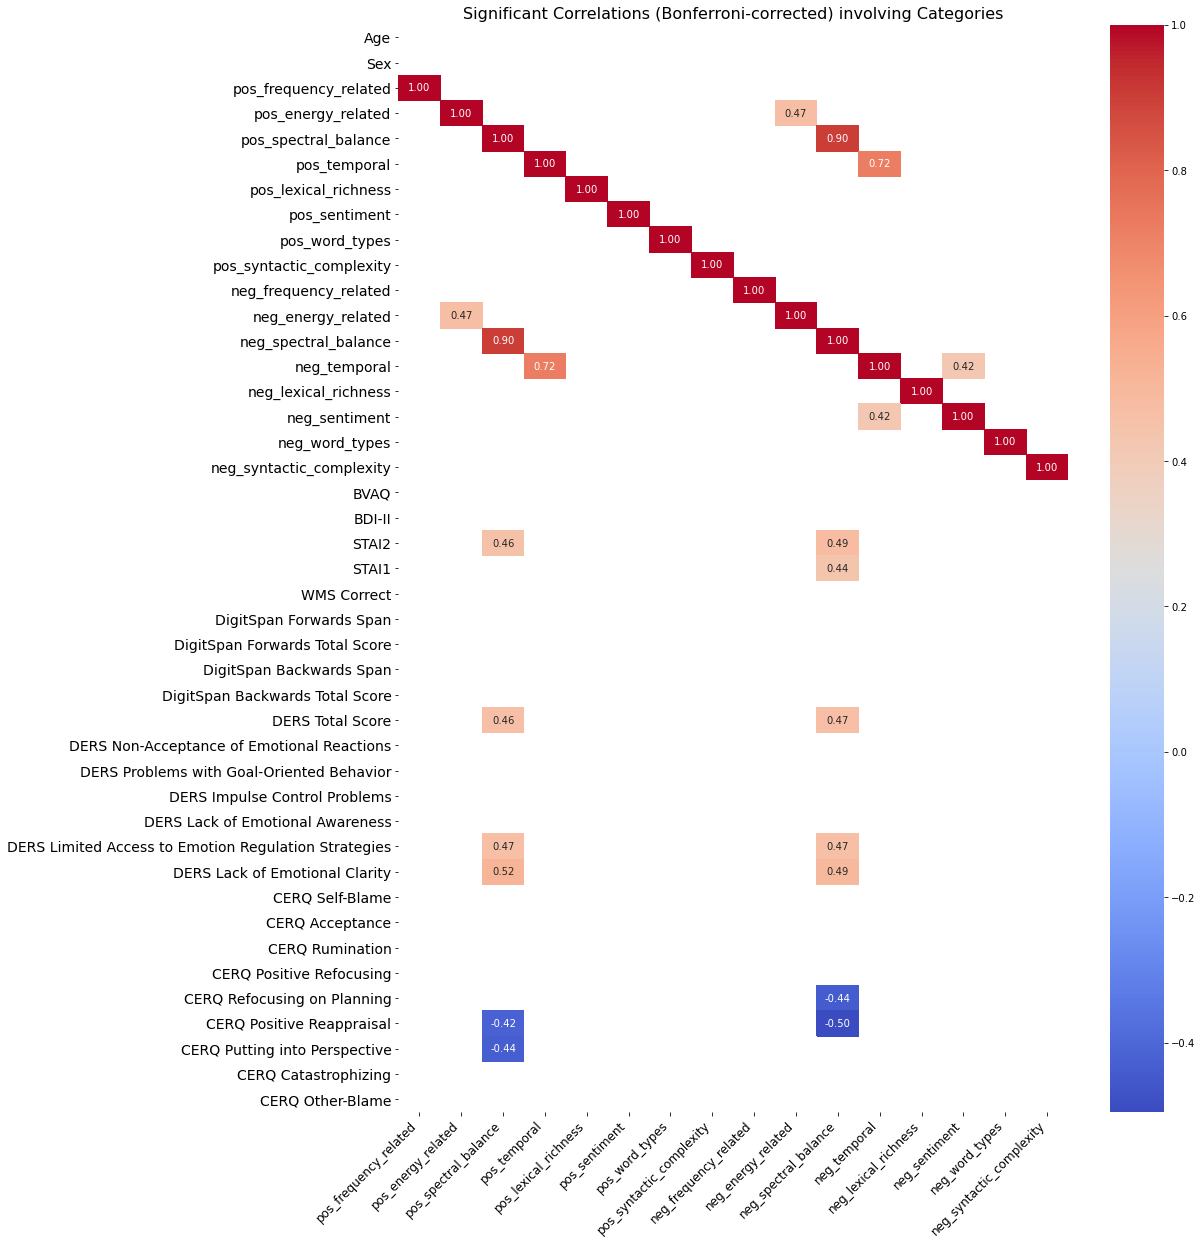

In [17]:

# Calculate the correlation matrix and the corresponding p-values matrix
def calculate_correlations(df):
    correlations = df.corr()
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlations.shape)
    return correlations, p_values

correlation_matrix, p_values = calculate_correlations(analysis_df_filtered) #analysis_df_filtered /  analysis_df

# Apply Bonferroni correction
alpha = 0.05
num_tests = p_values.size
bonferroni_threshold = alpha / num_tests

# Print the information for Bonferroni correction
print(f"Number of comparisons corrected for Bonferroni: {num_tests}")
print(f"Bonferroni correction threshold: {bonferroni_threshold}")

# Create a mask for significant correlations
significant_mask = (p_values < bonferroni_threshold)

# Update the factors variable with category names
factors = [
    "pos_frequency_related", "pos_energy_related", "pos_spectral_balance",
    "pos_temporal", "pos_lexical_richness", "pos_sentiment", "pos_word_types",
    "pos_syntactic_complexity", "neg_frequency_related", "neg_energy_related",
    "neg_spectral_balance", "neg_temporal", "neg_lexical_richness", "neg_sentiment",
    "neg_word_types", "neg_syntactic_complexity"
]

# Filter for correlations involving the categories
category_correlations = correlation_matrix.loc[factors, :]
category_p_values = p_values.loc[factors, :]

# Apply the mask for significant correlations
significant_categories_mask = category_p_values < bonferroni_threshold
significant_category_correlations = category_correlations.where(significant_categories_mask)

# Transpose the DataFrame to swap x and y axes
significant_category_correlations = significant_category_correlations.T

# Plot the significant category correlations using a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(significant_category_correlations, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, annot_kws={"size": 10})
plt.title('Significant Correlations (Bonferroni-corrected) involving Categories', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=14)

# Save the figure
plt.savefig('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questionnaire_category_correlation_significant.png', bbox_inches='tight')
# Show the plot
plt.show()

# Save the significant correlations to an Excel file
#significant_category_correlations.to_excel('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/significant_category_correlations.xlsx')
# Save the significant correlations to an Excel file (excluding NaN values)
significant_category_correlations.dropna(how='all', axis=0).dropna(how='all', axis=1).to_excel('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/significant_category_correlations.xlsx')

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Function to calculate correlations and p-values
def calculate_correlations(df):
    correlations = df.corr()
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlations.shape)
    return correlations, p_values

# Assuming analysis_df_filtered is already defined and cleaned

# Calculate the correlation matrix and the corresponding p-values matrix
correlation_matrix, p_values = calculate_correlations(analysis_df_filtered)

# Apply Bonferroni correction
alpha = 0.05
num_tests = p_values.size
bonferroni_threshold = alpha / num_tests

# Print the information for Bonferroni correction
print(f"Number of comparisons corrected for Bonferroni: {num_tests}")
print(f"Bonferroni correction threshold: {bonferroni_threshold}")

# Create a mask for significant correlations
significant_mask = (p_values < bonferroni_threshold)

# Update the factors variable with category names
factors = [
    "pos_frequency_related", "pos_energy_related", "pos_spectral_balance",
    "pos_temporal", "pos_lexical_richness", "pos_sentiment", "pos_word_types",
    "pos_syntactic_complexity", "neg_frequency_related", "neg_energy_related",
    "neg_spectral_balance", "neg_temporal", "neg_lexical_richness", "neg_sentiment",
    "neg_word_types", "neg_syntactic_complexity"
]

# Filter for correlations involving the categories
category_correlations = correlation_matrix.loc[factors, :]
category_p_values = p_values.loc[factors, :]

# Apply the mask for significant correlations
significant_categories_mask = category_p_values < bonferroni_threshold
significant_category_correlations = category_correlations.where(significant_categories_mask)
significant_category_p_values = category_p_values.where(significant_categories_mask)

# Extract significant correlations
significant_pairs = []
for row in significant_category_correlations.index:
    for col in significant_category_correlations.columns:
        if not pd.isna(significant_category_correlations.at[row, col]):
            significant_pairs.append({
                'Variable1': row,
                'Variable2': col,
                'Correlation': significant_category_correlations.at[row, col],
                'P-Value': significant_category_p_values.at[row, col]
            })

# Create a DataFrame from the significant pairs
significant_pairs_df = pd.DataFrame(significant_pairs)

# Save the significant correlations to a text file in APA style
with open('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/significant_category_correlations_apa.txt', 'w') as file:
    file.write('Table 1\n')
    file.write('Significant Correlations (Bonferroni-corrected) involving Categories\n')
    file.write('----------------------------------------\n')
    file.write(f"Number of comparisons corrected for Bonferroni: {num_tests}\n")
    file.write(f"Bonferroni correction threshold: {bonferroni_threshold:.5f}\n")
    file.write('----------------------------------------\n')
    file.write(f"{'Variable 1':<30} {'Variable 2':<30} {'Correlation':<15} {'P-Value':<15}\n")
    file.write('----------------------------------------\n')
    for _, row in significant_pairs_df.iterrows():
        file.write(f"{row['Variable1']:<30} {row['Variable2']:<30} {row['Correlation']:<15.3f} {row['P-Value']:<15.3e}\n")

# Optionally, you can also save to Excel
significant_pairs_df.to_excel('W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/significant_category_correlations_apa.xlsx', index=False)


Number of comparisons corrected for Bonferroni: 1849
Bonferroni correction threshold: 2.7041644131963226e-05


In [19]:
# Get the number of participants for each group
group_counts = speech_demographic_info_df.groupby('Group_MDD1_HC2').size()
print(group_counts)


Group_MDD1_HC2
1    48
2    46
dtype: int64


## Correlation separated per Group

Analyzing Group 1...


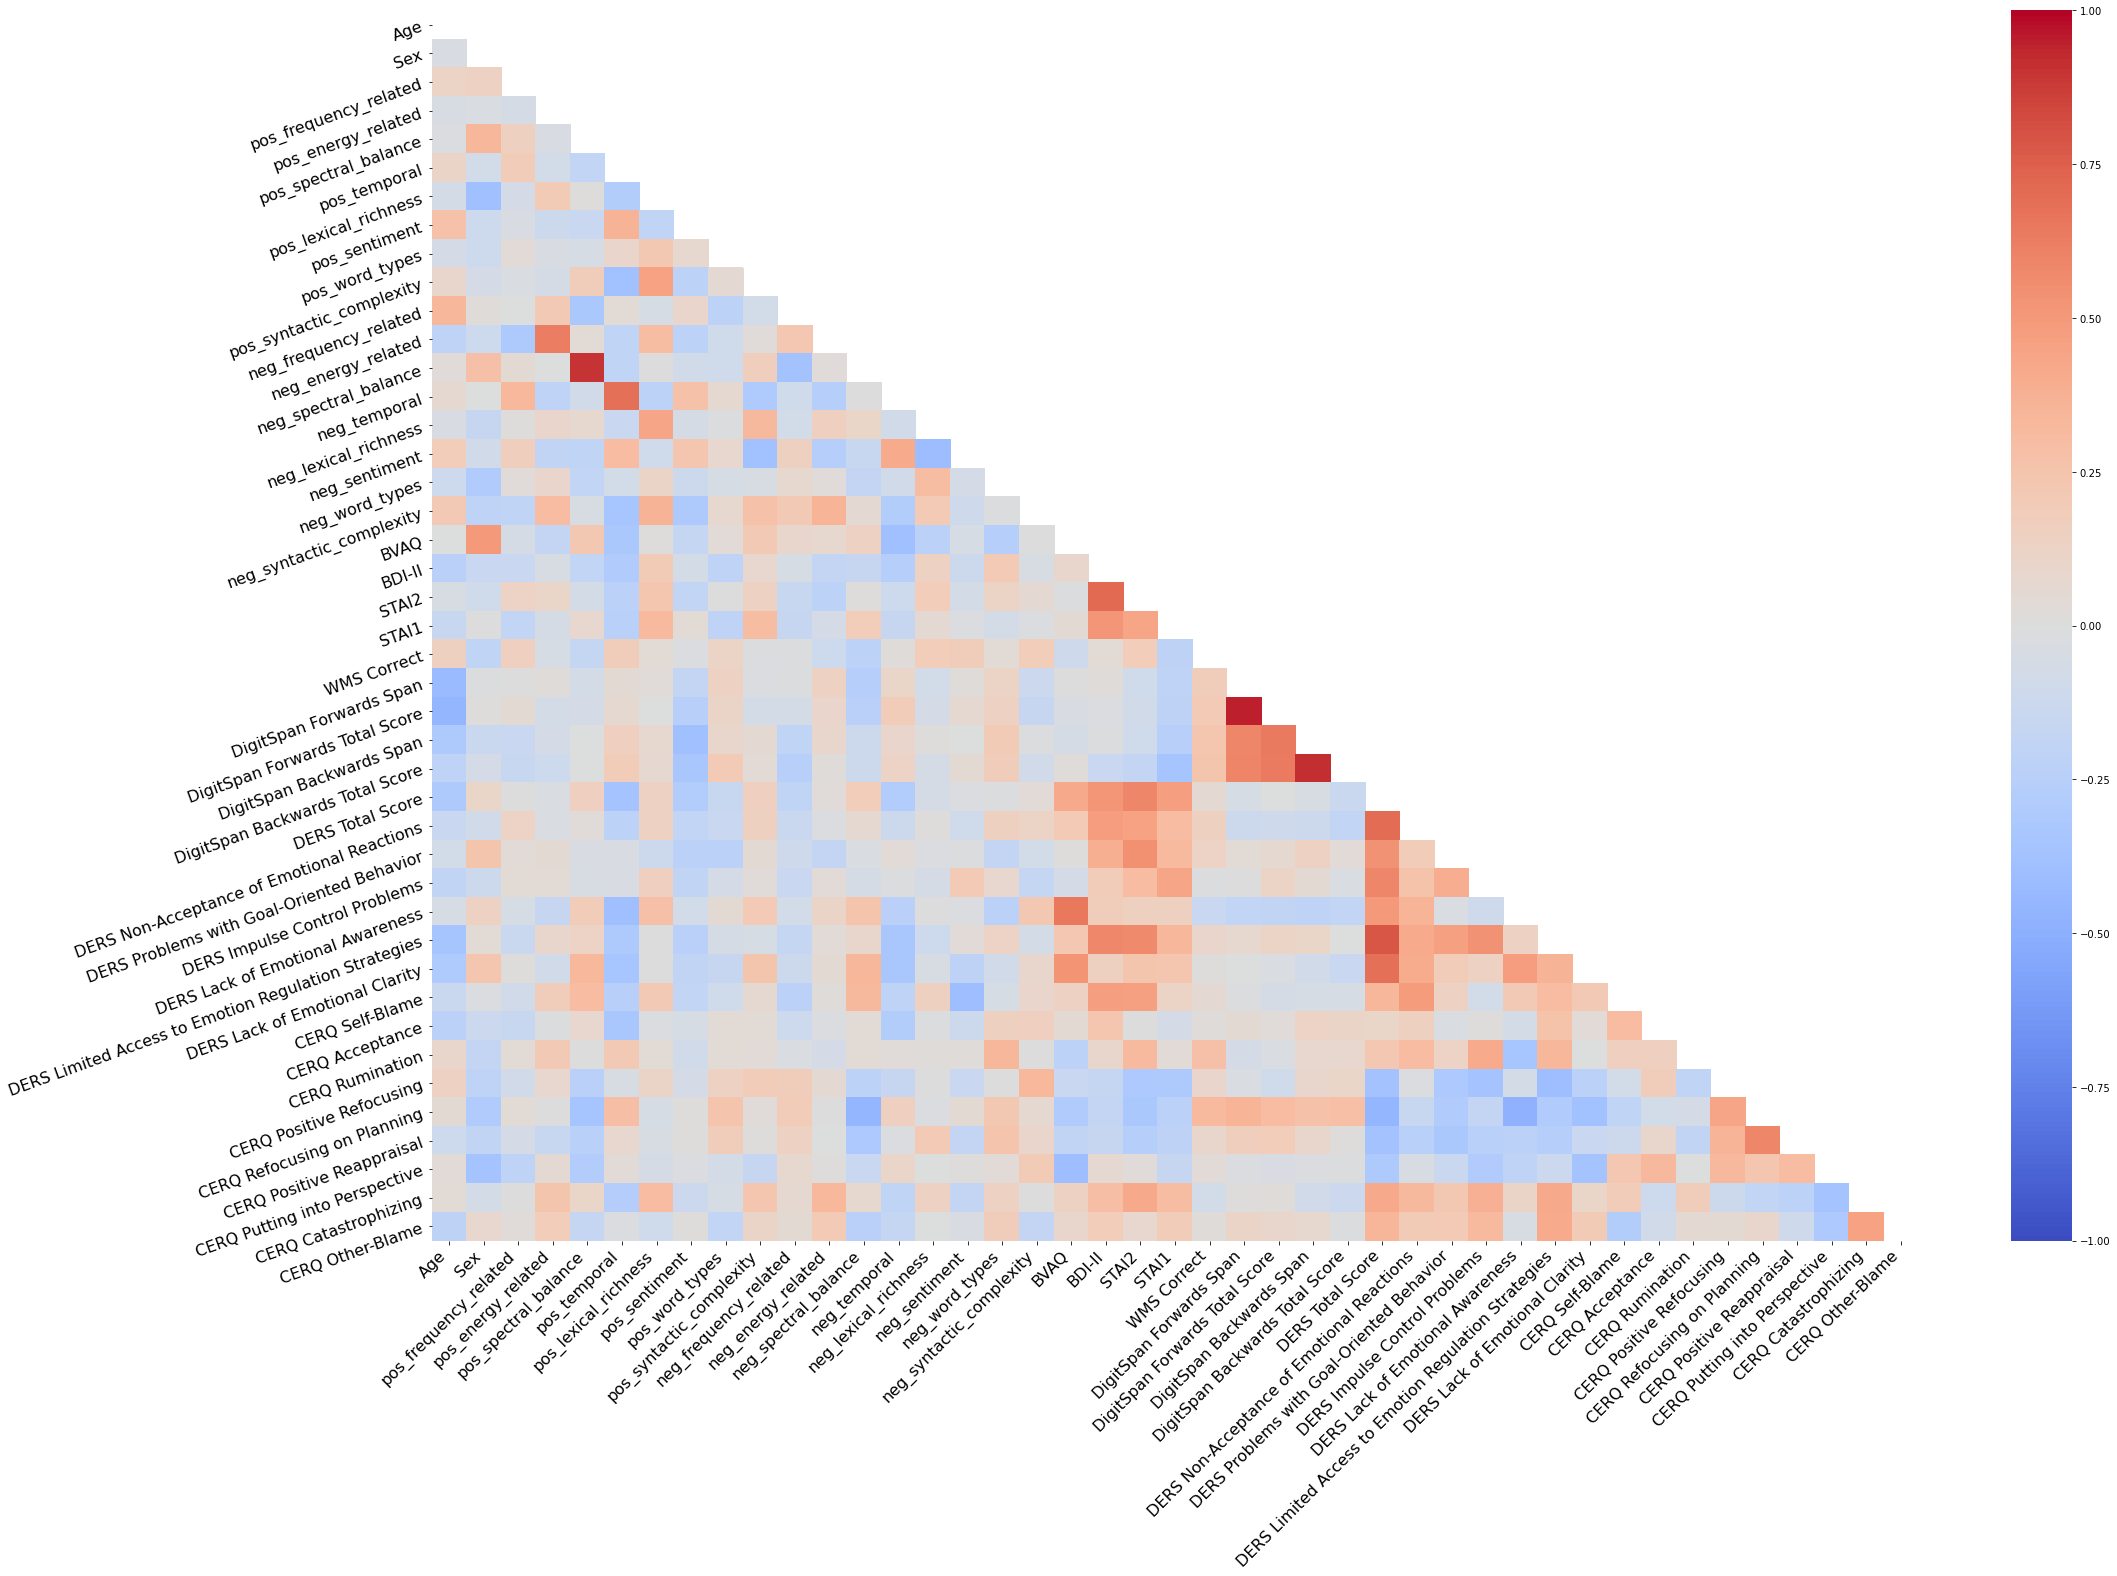

Correlation Matrix Summary:
             Age        Sex  pos_frequency_related  pos_energy_related  \
count  43.000000  43.000000              43.000000           43.000000   
mean   -0.037858  -0.020187               0.017402            0.044771   
std     0.243490   0.240583               0.198143            0.215587   
min    -0.453765  -0.388993              -0.308341           -0.209699   
25%    -0.199337  -0.141587              -0.080083           -0.063265   
50%    -0.046583  -0.076289               0.006613           -0.024005   
75%     0.078486   0.030665               0.053016            0.096327   
max     1.000000   1.000000               1.000000            1.000000   

       pos_spectral_balance  pos_temporal  pos_lexical_richness  \
count             43.000000     43.000000             43.000000   
mean               0.026503     -0.037884              0.086670   
std                0.267481      0.290121              0.232714   
min               -0.356891     -0.39

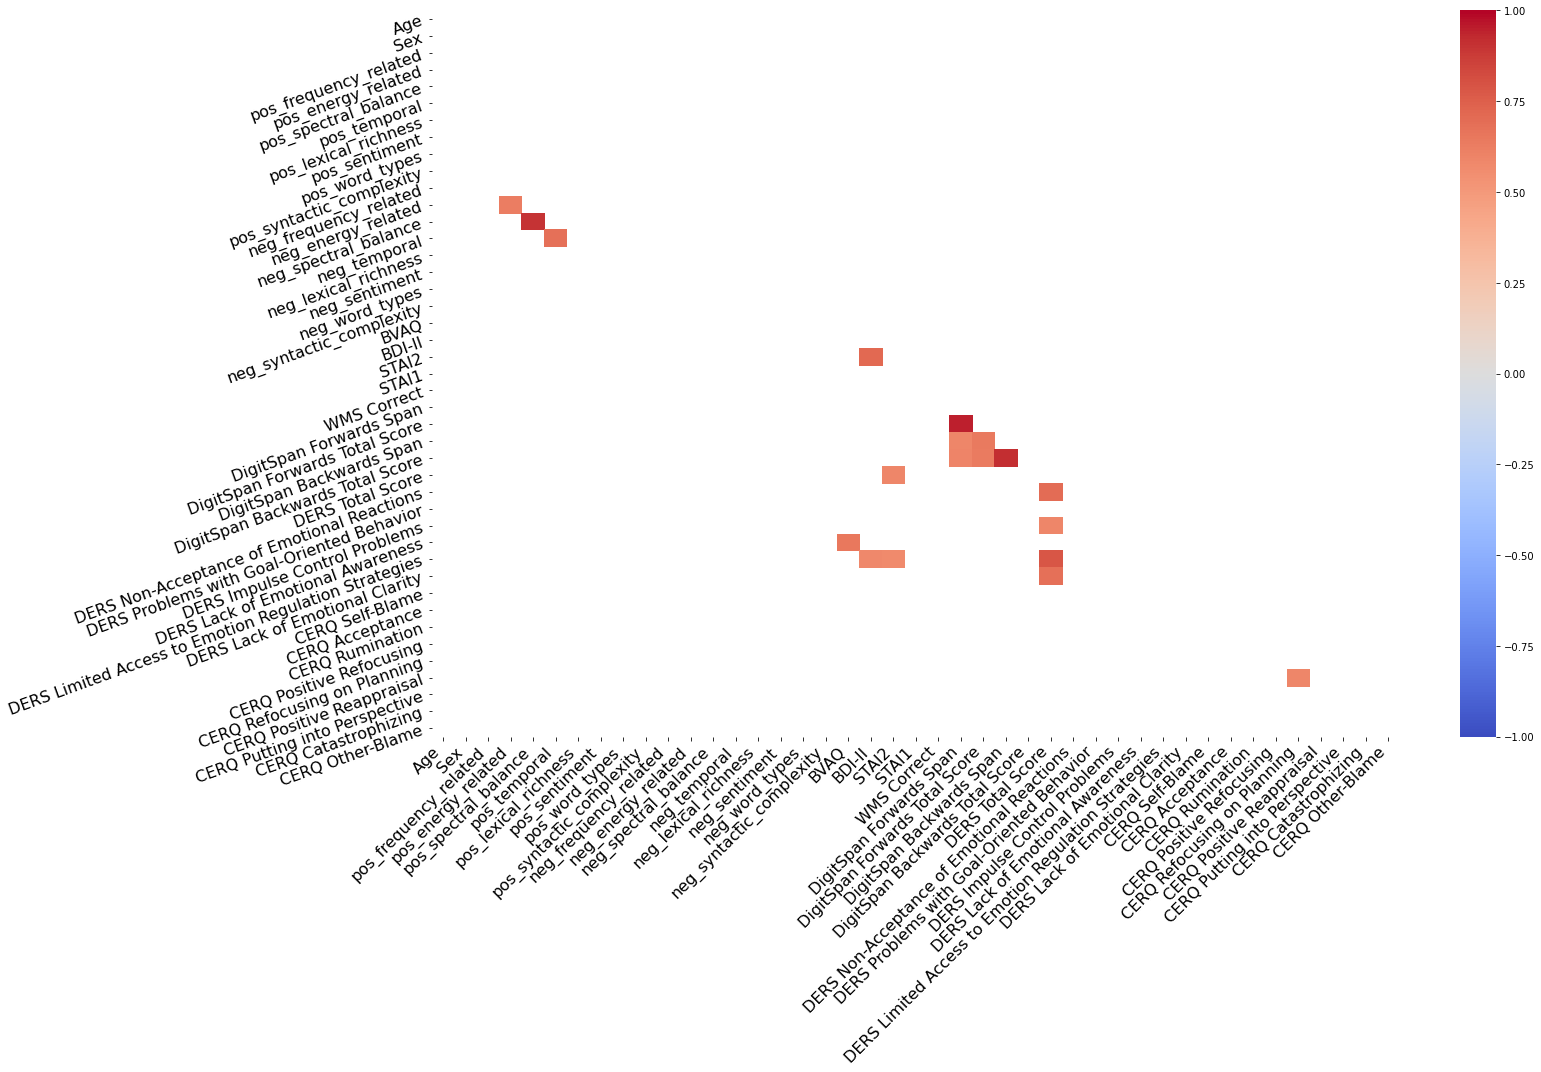

Significant Correlations Summary:
       Age  Sex  pos_frequency_related  pos_energy_related  \
count  1.0  1.0                    1.0            2.000000   
mean   1.0  1.0                    1.0            0.814529   
std    NaN  NaN                    NaN            0.262296   
min    1.0  1.0                    1.0            0.629058   
25%    1.0  1.0                    1.0            0.721793   
50%    1.0  1.0                    1.0            0.814529   
75%    1.0  1.0                    1.0            0.907264   
max    1.0  1.0                    1.0            1.000000   

       pos_spectral_balance  pos_temporal  pos_lexical_richness  \
count              2.000000      2.000000                   1.0   
mean               0.950576      0.841744                   1.0   
std                0.069896      0.223807                   NaN   
min                0.901152      0.683489                   1.0   
25%                0.925864      0.762617                   1.0   
50%  

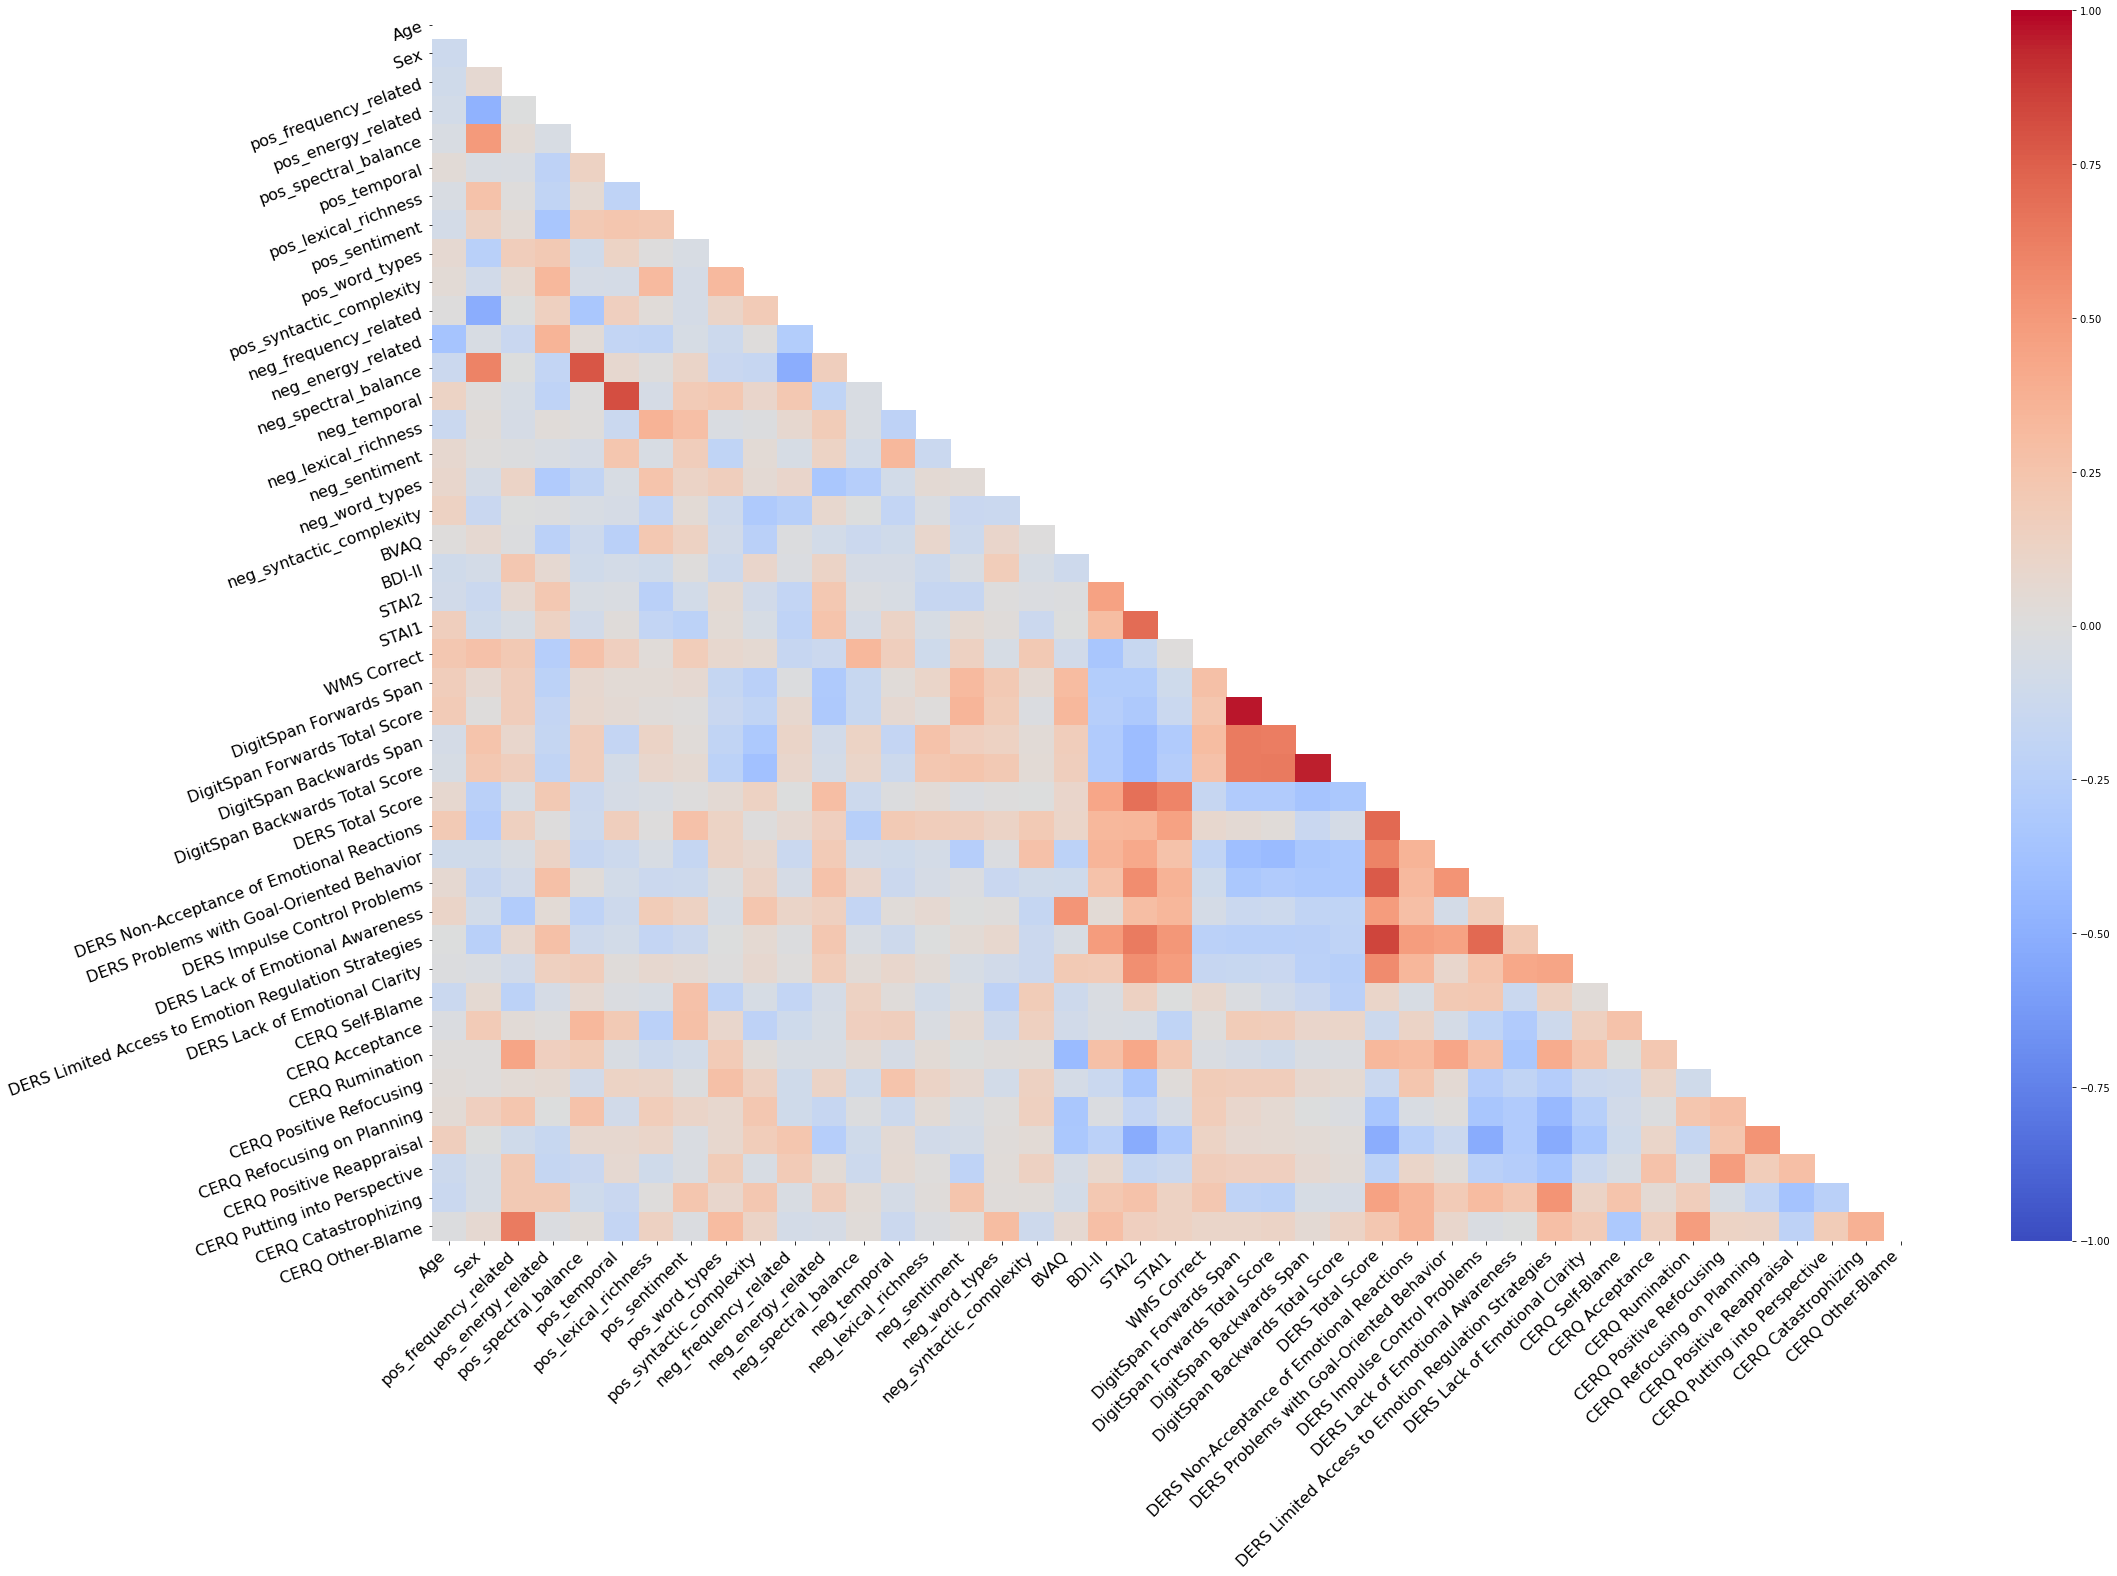

Correlation Matrix Summary:
             Age        Sex  pos_frequency_related  pos_energy_related  \
count  43.000000  43.000000              43.000000           43.000000   
mean    0.026577   0.016819               0.078016            0.007081   
std     0.192585   0.259947               0.216702            0.249913   
min    -0.354015  -0.513810              -0.283775           -0.477796   
25%    -0.085218  -0.103134              -0.042578           -0.178390   
50%     0.002926  -0.006360               0.040193           -0.003093   
75%     0.080790   0.066296               0.170242            0.152152   
max     1.000000   1.000000               1.000000            1.000000   

       pos_spectral_balance  pos_temporal  pos_lexical_richness  \
count             43.000000     43.000000             43.000000   
mean               0.056581      0.029648              0.037036   
std                0.247082      0.233845              0.215016   
min               -0.333646     -0.24

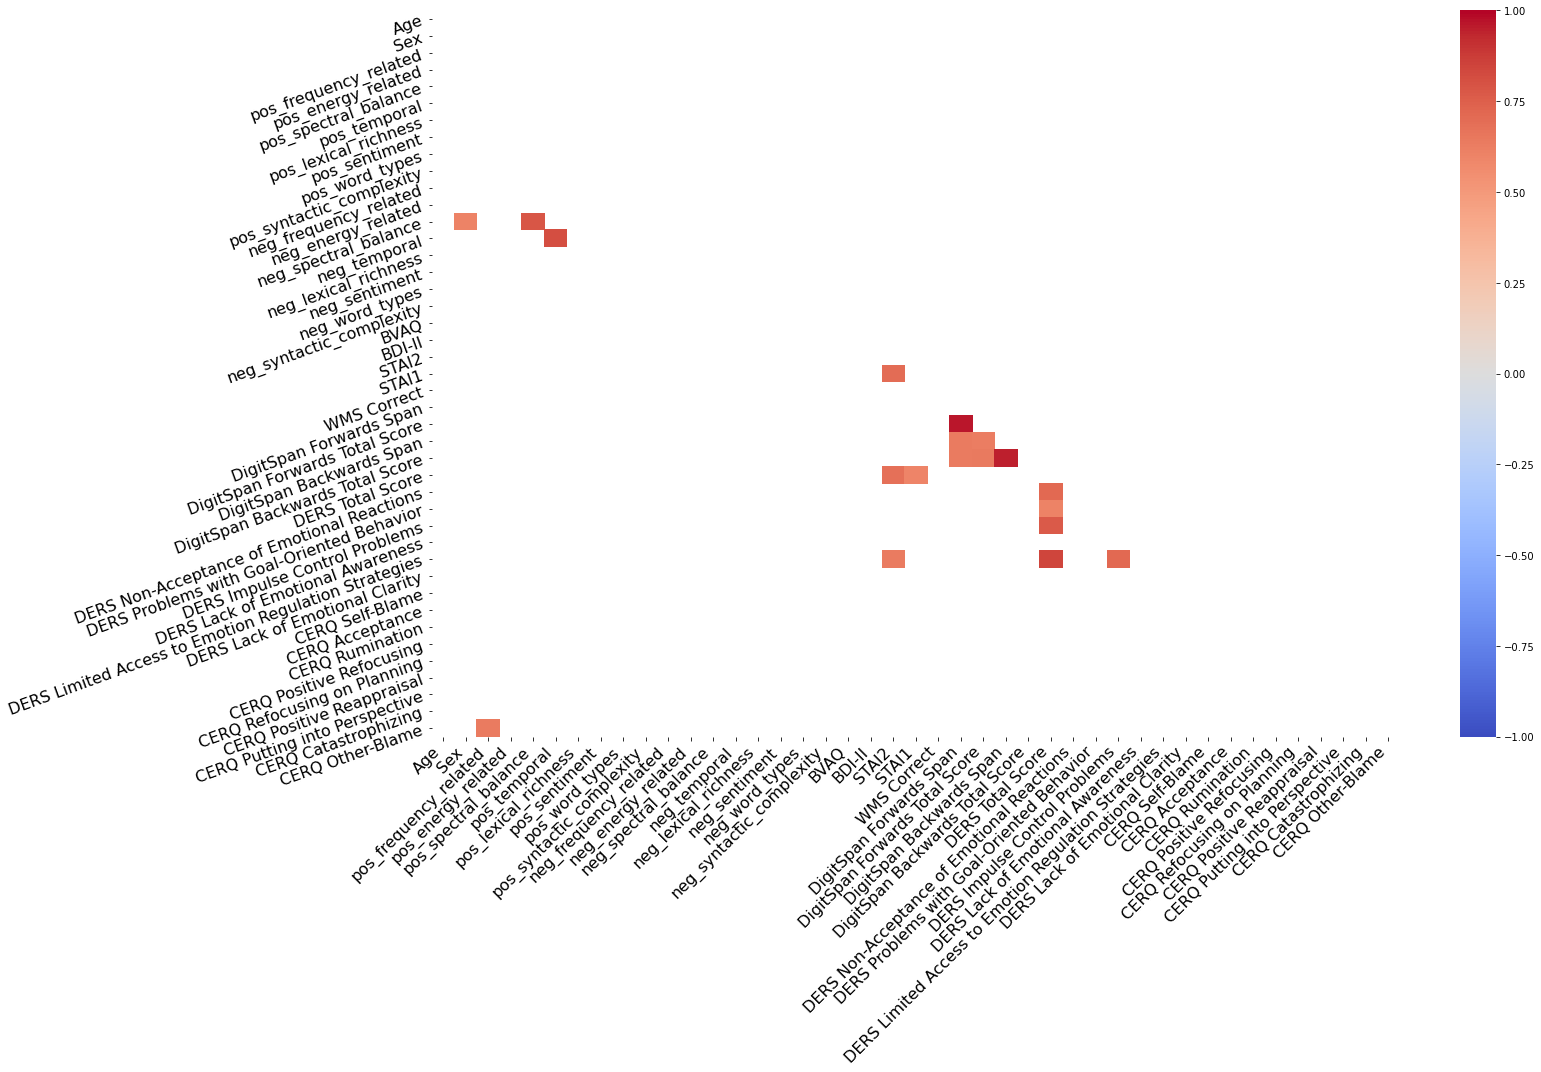

Significant Correlations Summary:
       Age       Sex  pos_frequency_related  pos_energy_related  \
count  1.0  2.000000               2.000000                 1.0   
mean   1.0  0.801009               0.818074                 1.0   
std    NaN  0.281415               0.257283                 NaN   
min    1.0  0.602018               0.636147                 1.0   
25%    1.0  0.701514               0.727111                 1.0   
50%    1.0  0.801009               0.818074                 1.0   
75%    1.0  0.900505               0.909037                 1.0   
max    1.0  1.000000               1.000000                 1.0   

       pos_spectral_balance  pos_temporal  pos_lexical_richness  \
count              2.000000      2.000000                   1.0   
mean               0.894262      0.906997                   1.0   
std                0.149536      0.131526                   NaN   
min                0.788524      0.813994                   1.0   
25%                0.841393

In [22]:
# Define the groups you want to analyze
groups = [1, 2]

# Calculate the correlation matrix and the corresponding p-values matrix
def calculate_correlations(df):
    correlations = df.corr()
    p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlations.shape)
    return correlations, p_values

# Loop through each group
for group in groups:
    print(f"Analyzing Group {group}...")
    
    # Filter the data for the current group
    analysis_df_group = analysis_df[analysis_df['Group'] == group]
    
    # Exclude columns that should not be part of the correlation analysis
    exclude_group = ['Group',
                     'TM Practice B', 'TM Practice A',
    'WMS Correct Norm',
    'Error B Norm',
    'TM B Norm',
    'B/A Norm',
    'Hamilton Score Norm',
    'DERS Total Score Norm',
    'DERS Non-Acceptance of Emotional Reactions Norm',
    'DERS Problems with Goal-Oriented Behavior Norm',
    'DERS Impulse Control Problems Norm',
    'DERS Lack of Emotional Awareness Norm',
    'DERS Limited Access to Emotion Regulation Strategies Norm',
    'DERS Lack of Emotional Clarity Norm',
    'CERQ Self-Blame Norm',
    'CERQ Acceptance Norm',
    'CERQ Rumination Norm',
    'CERQ Positive Refocusing Norm',
    'CERQ Refocusing on Planning Norm',
    'CERQ Positive Reappraisal Norm',
    'CERQ Putting into Perspective Norm',
    'CERQ Catastrophizing Norm',
    'CERQ Other-Blame Norm']  
    analysis_df_without_group = analysis_df_group.drop(columns=exclude_group)

    # Compute the correlation matrix
    correlation_matrix = analysis_df_without_group.corr()

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    # Plot the correlation matrix using a heatmap
    plt.figure(figsize=(32, 22))
    sns.heatmap(correlation_matrix, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True,vmin=-1, vmax=1) # Adjust vmin and vmax to -1 and 1 to cover the full range of correlations
    #plt.title(f'Correlation Matrix between Speech Features and Questionnaire Results for Group {group}')
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(rotation=20, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/significant_correlation_matrix_group_all{group}.jpg')
    plt.show()

    # Plot interactive heatmap using plotly.graph_objects
    fig = go.Figure(data=go.Heatmap(
        z=correlation_matrix.to_numpy(),
        x=correlation_matrix.columns.tolist(),
        y=correlation_matrix.index.tolist(),
        colorscale='Viridis',
        zmin=-1, zmax=1,
        showscale=True
    ))

    fig.update_layout(
        #title=f'Interactive Correlation Matrix between Speech Features and Questionnaire Results for Group {group}',
        xaxis=dict(tickangle=-45),
        yaxis=dict(tickangle=-20),
        autosize=False,
        width=1500,
        height=1500
    )

    fig.show()
    fig.write_html(f"W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/speech_questinnaire_correlations_interactive_group_{group}.html")

    # Calculate the correlation matrix and the corresponding p-values matrix for the current group
    correlation_matrix, p_values = calculate_correlations(analysis_df_without_group)

    # Debugging: Print a summary of the correlation matrix
    print("Correlation Matrix Summary:")
    print(correlation_matrix.describe())  # Check for the presence of both positive and negative correlations

    # Apply Bonferroni correction
    alpha = 0.05
    num_tests = p_values.size
    bonferroni_threshold = alpha / num_tests

    # Print the information for Bonferroni correction
    print(f"Number of comparisons corrected for Bonferroni: {num_tests}")
    print(f"Bonferroni correction threshold: {bonferroni_threshold}")

    # Create a mask for significant correlations
    significant_mask = (p_values < bonferroni_threshold)

    # Debugging: Check the range of p-values
    print("P-Value Matrix Summary:")
    print(p_values.describe())  # Ensure p-values cover the expected range

    # Mask insignificant correlations in the correlation matrix
    significant_correlations = correlation_matrix.where(significant_mask)

    # Create a mask for the upper triangle
    mask = np.triu(np.ones_like(significant_correlations, dtype=bool))

    # Plot the significant correlations using a heatmap
    plt.figure(figsize=(23, 15))
    sns.heatmap(significant_correlations, mask=mask, annot=False, fmt=".2f", cmap="coolwarm", cbar=True,vmin=-1, vmax=1)
    #plt.title(f'Significant Correlations (Bonferroni-corrected) between Speech Features and Questionnaire Results for Group {group}', fontsize=16)
    plt.xticks(rotation=45, ha='right', fontsize=16)
    plt.yticks(rotation=20, fontsize=16)
    plt.tight_layout()
    plt.savefig(f'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/plots/significant_correlation_matrix_group_{group}.jpg')
    plt.show()
    
    # Debugging: Print significant correlations before storing them
    print("Significant Correlations Summary:")
    print(significant_correlations.describe())  # Check if negative correlations are being filtered out
    
    # Extract significant correlations
    significant_pairs = []

    for row in range(correlation_matrix.shape[0]):
        for col in range(row+1, correlation_matrix.shape[1]):
            var1 = correlation_matrix.index[row]
            var2 = correlation_matrix.columns[col]
            if p_values.iloc[row, col] < bonferroni_threshold:
                significant_pairs.append({
                    'Variable1': var1,
                    'Variable2': var2,
                    'Correlation': correlation_matrix.iloc[row, col],
                    'P-Value': p_values.iloc[row, col]
                })

    # Convert the list of significant pairs to a DataFrame
    significant_pairs_df = pd.DataFrame(significant_pairs).drop_duplicates(subset=['Variable1', 'Variable2'])

    # Save the significant correlations to a CSV file
    significant_pairs_df.to_csv(f'W:/Fmri_Forschung/Allerlei/JuliaS/GitHub/SubliminalVideoPriming/data/speech/speech_questionnaire_correlation_corrected_group_{group}.csv', index=False)

    print(f"Analysis for Group {group} completed.\n")


In [21]:
significant_correlations

,Age,Sex,pos_frequency_related,pos_energy_related,pos_spectral_balance,pos_temporal,pos_lexical_richness,pos_sentiment,pos_word_types,pos_syntactic_complexity,...,DERS Lack of Emotional Clarity,CERQ Self-Blame,CERQ Acceptance,CERQ Rumination,CERQ Positive Refocusing,CERQ Refocusing on Planning,CERQ Positive Reappraisal,CERQ Putting into Perspective,CERQ Catastrophizing,CERQ Other-Blame
Age,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_frequency_related,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.636147
pos_energy_related,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_spectral_balance,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_temporal,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_lexical_richness,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_sentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_word_types,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pos_syntactic_complexity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
